<a href="https://colab.research.google.com/github/mauromaia071/Trabalho-dados/blob/main/Trabalho_Mauro_Maia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos microdados do Enem 2022

O Enem (Exame Nacional do Ensino Médio) é uma prova anual que avalia o desempenho dos estudantes ao final do ensino médio no Brasil. A nota do Enem é usada como critério de seleção para o ingresso no ensino superior, tanto em universidades públicas (Sisu) quanto em universidades privadas (ProUni, Fies).
Este exame gera, alem da nota, dados de fatores sociais, como situação economica do participante, estado civil e nacionalidade.

## Objetivos

A partir destes dados, nesse trabalho será gerado um modelo de classificação quanto a abstenção dos candidatos a prova, a fim de responder perguntas como:



*   Em qual dos dias de prova há uma maior taxa de abstenção. E qual a taxa total?
*   A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?
*   A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?
*   A renda familiar mensal influencia a ausência do candidato na prova?

*   Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?
*   Existe alguma diferença na taxa de abstenção entre pessoas do sexo masculino e do sexo feminino?
*   Quais regiões apresentam as maiores e as menores taxas de abstenção?


























Para executar este projeto serão necessarias basicamente 3 etapas:

1.   Seleção da base de dados e Revisão bibliográfica.
2.   Analise exploratoria dos dados e organização da base.
3.   Desenvolvimento do modelo e testes.








# Seleção da base de dados e Revisão bibliográfica

A base de dados utilizada será a base divulgada pelo proprio INEP no site Gov.br. Pode ser encontrada no site:

*   https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem




É importante destacar dois artigos cientificos utilizados de referencia para a analise dos indicadores, principalmente sociais, dos microdados apresentados:

*   https://www.scielo.br/j/rap/a/ZHJFnmsrdgGH8cj6xHHwbKg/
*   http://educa.fcc.org.br/scielo.php?pid=S1676-25922015000300523&script=sci_abstract

Este trabalho tem como exemplo dois repositorios do Github dos usuário Bruno Santana e Pedro Almeida disponibilizados em:

*   https://github.com/Bruno-Santana-Eco/Analise-de-Dados-ENEM
*   https://github.com/allmeidaapedro/Enem-Analysis/tree/main







# Apresentação da Base de dados

Nesta seção a base de dados será carregada e serão discutidas algumas caracteristicas da mesma.

Em um primeiro momento será utilizada uma biblioteca de Auto Machie Learning para  analise dos dados, a biblioteca escolida foi a Pycaret:

*   Instalar a Pycaret e carregar as bibliotecas






In [1]:
!pip install pycaret

In [5]:
import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pycaret
import shap
from pycaret.regression import *



# Processamento dos dados

In [6]:
df=pd.read_csv('MICRODADOS_ENEM_2022.csv',sep=';',encoding='ISO-8859-1')
df.shape

(3476105, 76)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

Como existem muitas colunas que não serão utilizadas para essa analise basta exclui-las:

In [9]:
dadosapurados = df.drop(['CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TP_LINGUA','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025'], axis =1)


Com os dados carregados é o momento de separa uma parte do banco de dados para treino:

In [10]:
train, test = train_test_split(dadosapurados, test_size=0.05, random_state=42)

Após a definição dos dados de treino sera criado um setup para treinar os modelos e definir o parametro alvo, esse setup funciona tanto para modelos de classificação quanto de regressão:

In [11]:
reg = setup(data = train, target = 'TP_PRESENCA_CH', train_size=0.01)

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pipeline.py:111: UserWarning: Persisting input arguments took 1.06s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  X, y = pipeline._memory_transform(transformer, X, y)
/usr/local/lib/python3.11/dist-packages/pycaret/internal/pipeline.py:111: UserWarning: Persisting input arguments took 4.19s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  X, y = pipeline._memory_transform(transformer, X, y)
/usr/local/lib/python3.11/dist-packages/pycaret/internal/pipeline.py:111: UserWarning: Persisting input arguments took 4.33s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases)

,Description,Value
0,Session id,6598
1,Target,TP_PRESENCA_CH
2,Target type,Regression
3,Original data shape,"(3302299, 27)"
4,Transformed data shape,"(3302299, 27)"
5,Transformed train set shape,"(33022, 27)"
6,Transformed test set shape,"(3269277, 27)"
7,Numeric features,21
8,Categorical features,5
9,Rows with missing values,73.6%


A partir do setup a próxima etapa é treinar e comparar os modelos.

In [13]:
compare_models(round=3, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.000,0.000,0.000,1.000,0.000,0.000,1.626
rf,Random Forest Regressor,0.000,0.000,0.000,1.000,0.000,0.000,2.730
ridge,Ridge Regression,0.000,0.000,0.000,1.000,0.000,0.000,0.314
dt,Decision Tree Regressor,0.000,0.000,0.000,1.000,0.000,0.000,0.390
lightgbm,Light Gradient Boosting Machine,0.000,0.000,0.000,1.000,0.000,0.000,2.956
et,Extra Trees Regressor,0.000,0.000,0.000,1.000,0.000,0.000,2.079
ada,AdaBoost Regressor,0.000,0.000,0.000,1.000,0.000,0.000,0.553
gbr,Gradient Boosting Regressor,0.000,0.000,0.000,1.000,0.000,0.000,4.745
xgboost,Extreme Gradient Boosting,0.000,0.000,0.000,1.000,0.000,0.000,0.529
lar,Least Angle Regression,0.011,0.001,0.019,0.996,0.013,0.009,0.705


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


LinearRegression(n_jobs=-1)

Com isso pode ser observa-se que alguns modelos apresentaram resultados nulos e por isso não há possibilidade de considera-los, o modelo a ser testado será Least Angle Regression (lar), a criação deste modelo vem no codigo abaixo.

In [14]:
lar = create_model('lar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0052,0.0001,0.0082,0.9997,0.0064,0.0044
1,0.0055,0.0001,0.0088,0.9996,0.0069,0.0046
2,0.0057,0.0001,0.0093,0.9996,0.0072,0.0049
3,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000
4,0.0106,0.0003,0.0168,0.9986,0.0125,0.0093
5,0.0054,0.0001,0.0085,0.9996,0.0064,0.0047
6,0.0054,0.0001,0.0088,0.9996,0.0067,0.0046
7,0.0312,0.0039,0.0622,0.9809,0.0380,0.0256
8,0.0055,0.0001,0.0088,0.9996,0.0070,0.0046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

A biblioteca possibilita uma busca de hiperparametros a fim de melhorar o modelo

In [15]:
lar_tuned = tune_model(lar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0052,0.0001,0.0081,0.9997,0.0064,0.0044
1,0.0055,0.0001,0.0088,0.9996,0.0069,0.0046
2,0.0058,0.0001,0.0093,0.9996,0.0072,0.0049
3,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000
4,0.0053,0.0001,0.0084,0.9997,0.0063,0.0047
5,0.0054,0.0001,0.0085,0.9996,0.0064,0.0047
6,0.0054,0.0001,0.0088,0.9996,0.0067,0.0046
7,0.0054,0.0001,0.0085,0.9996,0.0066,0.0045
8,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pode ser observado que com essa etapa o modelo apresentou melhoria nos parametros de R2 e MSE, com isso o modelo lar_tuned será utilizado.

Com esses dados é possivel plotar graficos com as caracteristicas do modelo.

O primeiro Grafico é o do erro:

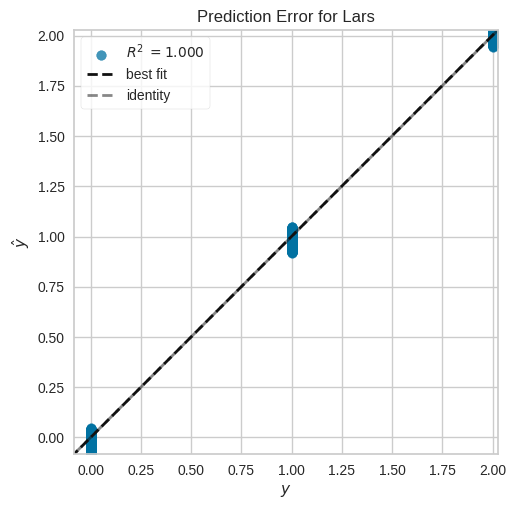

In [16]:
plot_model(lar_tuned, plot = 'error')

O gráfico apresentou uma aproximação muito grande, com um erro tendendo a 0.

É possivel comparar os residuos em gráfico:

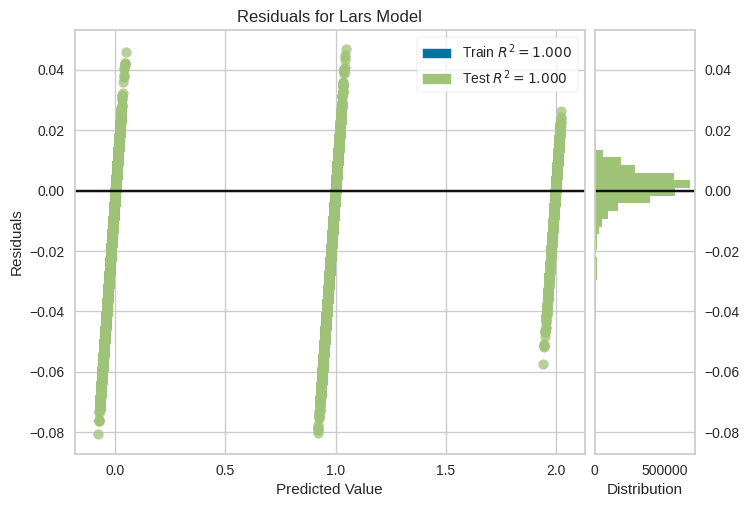

In [17]:
plot_model(lar_tuned, plot = 'residuals')

Um gráfico muito interessante é o que comara a importancia de cada caracteristica dos dados em relação ao modelo:

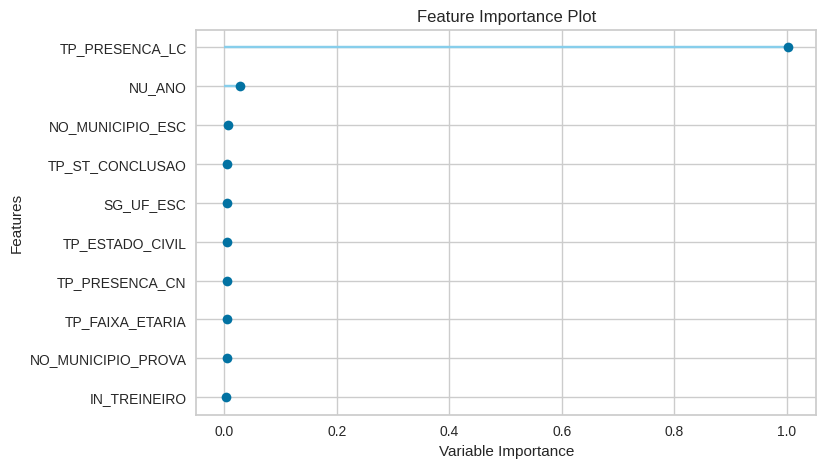

In [18]:
plot_model(lar_tuned, plot = 'feature')

Pode se observar que o dado que teve mais peso é o TP_PRESENCA_LC que indica a presença no primeiro dia da prova, ele influencia mais na analise da presença no segundo dia da prova

A ultima etapa é finalizar e salvar o modelo para ser utilizado em produção:

In [20]:
finallar=finalize_model(lar_tuned)

In [21]:
save_model(finallar,'modelo_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NU_INSCRICAO', 'NU_ANO',
                                              'TP_FAIXA_ETARIA',
                                              'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                                              'TP_NACIONALIDADE',
                                              'TP_ST_CONCLUSAO',
                                              'TP_ANO_CONCLUIU', 'TP_ESCOLA',
                                              'TP_ENSINO', 'IN_TREINEIRO',
                                              'CO_MUNICIPIO_ESC', 'CO_UF_ESC',
                                              'TP_DEPENDENCIA_ADM_ESC',
                                              'TP_LOCALIZACAO_ESC',
                                              'TP_SIT_FUN...
                                                                          'mapping': F      0
 M      1
 NaN   -1
 dtype: int64}]))),
      

E este acima é o modelo final.

## Conclusões

Os resultados preliminares não foram muito satisfatorios, apresentando as caracteristicas de erro nos gráficos em formato inconclusivo pois os gráficos estão "Muito Certos", com uma melhor limpesa e separação da base de dados será possivel a obter um modelo mais acertivo.

Contudo pode-se concluir que esta proposta é valida para a utilização ao longo do curso.